In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils/")
from train_tools import train_qg_pfn

In [5]:
base_dir = "/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/"
CFs = [0.0,1/3,2/3,1,4/3,5/3,2,7/3,8/3,3]
CAs = [3.0]

In [6]:
pfns = {}
rocs = {}
aucs = {}
mass_rocs = {}
mass_aucs = {}
mult_rocs = {}
mult_aucs = {}

#vars for comparison roc curves
for CF in CFs:
    fname_gg = base_dir+'H2gg-1M-CF1.3CA3.0/total.root'
    fname_qq = base_dir+'H2qq-1M-CF{0:.1f}CA3.0/total.root'.format(CF)
    
    output = train_qg_pfn(fname_qq,fname_gg,nev_max=500000,n_epoch=3)
    
    pfns[CF] = output[0]
    rocs[CF] = output[1][0]
    aucs[CF] = output[1][1]
    mass_rocs[CF] = output[2][0]
    mass_aucs[CF] = output[2][1]
    mult_rocs[CF] = output[3][0]
    mult_aucs[CF] = output[3][1]

qmaxmult = 4, gmaxmult = 15
Made quark/gluon input arrays
Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_8[0][0]   

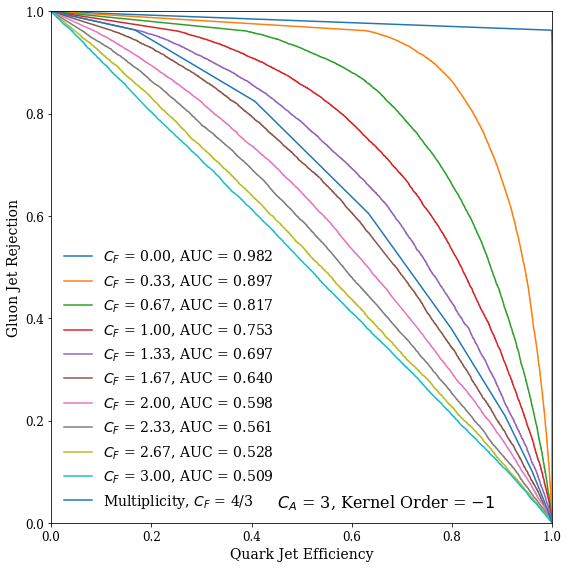

In [7]:
#plotting ROC curves

# some nicer plot settings 
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
for CF in CFs:
    pfn_fp, pfn_tp, threshs = rocs[CF]
    plt.plot(pfn_tp, 1-pfn_fp, '-', label=r'$C_F$ = {0:.2f}, AUC = {1:.3f}'.format(CF,aucs[CF]))
    
plt.plot(mult_rocs[4/3][1],1-mult_rocs[4/3][0],"-",label=r'Multiplicity, $C_F$ = 4/3')

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=14)
plt.text(0.45,0.03,r"$C_A$ = 3, Kernel Order = $-1$",fontsize=16)
plt.savefig("PFN_ROCs_CFscan_kerneln1.png")
plt.show()

In [6]:
pfns2 = {}
rocs2 = {}
aucs2 = {}
mass_rocs2 = {}
mass_aucs2 = {}
mult_rocs2 = {}
mult_aucs2 = {}

#vars for comparison roc curves
for CF in CFs:
    fname_gg = base_dir+'H2gg-1M-CF1.3CA3.0/total.root'
    fname_qq = base_dir+'H2qq-1M-CF{0:.1f}CA3.0/total.root'.format(CF)
    
    output = train_qg_pfn(fname_qq,fname_gg,nev_max=25000,n_epoch=3)
    
    pfns2[CF] = output[0]
    rocs2[CF] = output[1][0]
    aucs2[CF] = output[1][1]
    mass_rocs2[CF] = output[2][0]
    mass_aucs2[CF] = output[2][1]
    mult_rocs2[CF] = output[3][0]
    mult_aucs2[CF] = output[3][1]

qmaxmult = 4, gmaxmult = 13
Made quark/gluon input arrays
Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_71 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_71[0][0]  

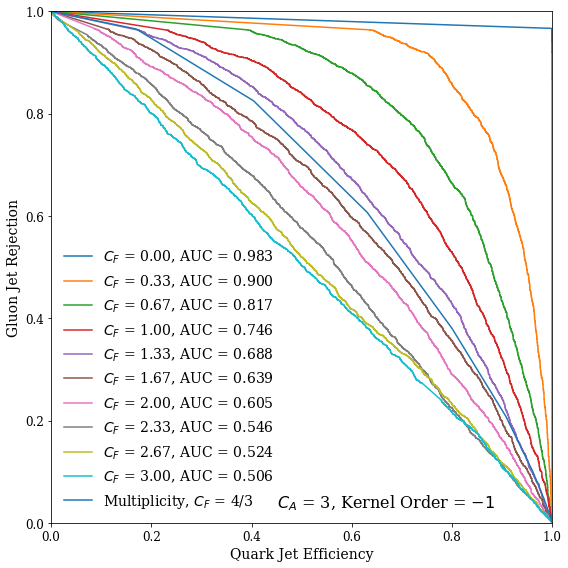

In [11]:
#plotting ROC curves

# some nicer plot settings 
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
for CF in CFs:
    pfn_fp, pfn_tp, threshs = rocs2[CF]
    plt.plot(pfn_tp, 1-pfn_fp, '-', label=r'$C_F$ = {0:.2f}, AUC = {1:.3f}'.format(CF,aucs2[CF]))
    
plt.plot(mult_rocs2[4/3][1],1-mult_rocs2[4/3][0],"-",label=r'Multiplicity, $C_F$ = 4/3')

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=14)
plt.text(0.45,0.03,r"$C_A$ = 3, Kernel Order = $-1$",fontsize=16)
plt.savefig("PFN_ROCs_CFscan_kerneln1_v2.png")
plt.show()

In [13]:
pfns3 = {}
rocs3 = {}
aucs3 = {}
mass_rocs3 = {}
mass_aucs3 = {}
mult_rocs3 = {}
mult_aucs3 = {}

#vars for comparison roc curves
for CF in CFs:
    fname_gg = base_dir+'H2gg-1M-CF1.3CA3.0/total.root'
    fname_qq = base_dir+'H2qq-1M-CF{0:.1f}CA3.0/total.root'.format(CF)
    
    output = train_qg_pfn(fname_qq,fname_gg,nev_max=250000,n_epoch=3)
    
    pfns3[CF] = output[0]
    rocs3[CF] = output[1][0]
    aucs3[CF] = output[1][1]
    mass_rocs3[CF] = output[2][0]
    mass_aucs3[CF] = output[2][1]
    mult_rocs3[CF] = output[3][0]
    mult_aucs3[CF] = output[3][1]

qmaxmult = 4, gmaxmult = 15
Made quark/gluon input arrays
Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_141 (Activation)     (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_141[0][0] 

In [14]:
for CF in CFs:
    pfns[CF].model.save("saved_models/kern-1/PFN_100k_CF{0:.2f}_CA3.0".format(CF))
    pfns2[CF].model.save("saved_models/kern-1/PFN_50k_CF{0:.2f}_CA3.0".format(CF))
    pfns2[CF].model.save("saved_models/kern-1/PFN_500k_CF{0:.2f}_CA3.0".format(CF))